<div style="background-color: #f39100; color: #006b94">

from module description / to check progress against:
# Module Guidelines
### Define the goal of your analysis
~~- How can you define your goal as a question that you can answer with data analysis?
    - Which sub questions do you need to answer to answer this question?~~
### Data Handling
~~- Reflect on your data set.How was it collected? 
    - Where does it come from? What implications does that have for answering your question?~~
~~- Load your data and observe what state your data is in.~~
~~- Identify things that need to be cleaned and preprocessed and make a plan for which processing steps you need.
    - E.g., correcting data types, filling in missing values, removing unneeded columns,...~~
- Execute that plan and document the resulting data set.

### Methods
~~- Identify which parts of the dataset are most relevant to answering your questions
    - Which features are most relevant?
    - What can you say about the quality of these features? How will it influence your analysis?~~
~~- Select which methods you want to use to answer your questions.
    - Which results will you generate?
    - How do these results answer your question?
    - What are threads to validity?~~
~~- Example Methods:~~
~~- Descriptive statistics: eg. median, quartiles, mean, standard deviation.~~
    - Measures of correlation: Chi² test for stochastic independence
~~- Data visualizations, eg. countplots for categorical data; histograms and distributions for typical values of float data; scatterplots for relations between two numerical variables, etc.~~
    - These visualizations should be relevant to the question you are trying to answer.
    
### Results and Discussion
- Generate results with the methods defined above.
- Interpret individual results
    - What does the result mean?
    - Does it answer your question?
    - Is it robust?
- The big picture
    - Come back to the original question. What do you conclude from your results?
    - How do your results compare to what is known?
    - Are there any questions that are left unanswered or that are answered with low confidence? How could future studies address them?
</div>

<div style="background-color: #ffdd00; color: #006b94">
<br> 
    
## to do:
- winner city as % of total # of participants
- chi2 test
- logistic regression
    
</div>


# <b>HR Analytics: Job Change of Data Scientists</b>
    

# Context and Content

<p><img style="float: right;margin:5px 20px 5px 1px" width="250" height="300"src="https://images.contentful.com/qlyl6owtxco5/68FN5f7XIQUuGqCuw0WYMM/a9d52190a294dc23dad118df1b4da07f/Career_Management.jpg"></p>
<p>A company wants to hire new employees in the field of Data Science. To attract potential candidates to the company, it offers courses in Data Science. Many people are interested and sign up for the training. Out of the group of participants the company could recruit candidates and offered them a job.</p>
<p>What the company doesn't know is which of the potential positive candidates also want to work for them afterwards and which ones just take the training for themselves without having a real interest in later employment. The better the company can identify those who are truly interested, the better it can focus its investment of time and resources on this group of people. The company has information on demographics, education and experience from the candidate's application and enrollment.</p>

## Aim of the report
<p>The two burning questions are:</p>
<ul>
    <li>Based on candidates demographics, education and experience - how likely is it that a data scientistic candidate chooses to work for a new company? </li>
    <li>What are the key factors that influence a data scientistic candidate in her/his decision for leaving his current job and starting in a new company?</li></ul>
    The analysis is of interest not only to this specific company but potentially to HR professionals in general. </p>

# The data set
## Reflection on the data set
The data is provided by [kaggle.com](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists), it was created and last updated on 2020-12-07. The dataset owner is Moebius - a data scientist at Healthcare. There is no information available on how the data was collected.
<p> As the source of data is unknown it is recommended to collect and analyze further data sets on the topic before using the results to make business decisions in the area of Data Scientists recruiting.</p>

## Importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import scipy.stats as scs
from scipy import stats
from copy import deepcopy

## The high-level overview of the data set

In [6]:
# Read dataset
data = 'datasets/aug_train.csv'
train= pd.read_csv(data)

# Print out the first few rows of the DataFrame
display(train.head(5))
# Print the number of rows and columns
print("Number of rows and columns in data set:", train.shape)

# Print the data types for each variable
print("\nThese are the data types for each variable:")
display(train.dtypes)

# Check if enrollee_id is not null and not nan
print("\nOccurrences of 'enrollee_id' being 'NaN':",train['enrollee_id'].isna().sum(), "\nOccurrences of 'enrollee_id' being null:",train['enrollee_id'].isnull().sum())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Number of rows and columns in data set: (19158, 14)

These are the data types for each variable:


enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


Occurrences of 'enrollee_id' being 'NaN': 0 
Occurrences of 'enrollee_id' being null: 0


The data set has 19158 rows and 14 variables. The variable 'enrollee_id' has neiter NaN nor null values. This variable can be used as the reference point for the sum of all rows.

### The meaning and roles of the variables
<b>The variable <em>enrollee_id</em> is for identifying a data set of one candidat.</b>
<ul>
    <li>enrollee_id = unique ID for enrollee</li>
</ul>
<b>The following variables are the independent variables of the analysis:</b>
<ul>
    <li>city = city code</li>
    <li>city_development_index = developement index of the city (scaled)</li>
    <li>gender = male/female</li>
    <li>relevent_experience = relevent experience in Data Science</li>
    <li>enrolled_university = type of university course enrolled if any</li>
    <li>education_level = highest level of education so far</li>
    <li>major_discipline = major discipline in education</li>
    <li>experience = total experience in years</li>
    <li>company_size = no of employees in current employer's company</li>
    <li>company_type = type of current employer's company</li>
    <li>last_new_job = difference in years between the start date of previous job, and start date of current job</li>
    <li>training_hours = time spent for training on offered courses in Data Science</li>
</ul>
<b>The variable <em>target</em> is the dependent variable of the analysis.</b>
<ul>
    <li>target = company sees candidate as target and wants to hire the candidate (1 = yes / 0 = no).</li>
</ul> 


### Scales of the statistical data

The variables in the data set can be classified into three different scales:

**Nominal scale**
<ul>
    <li>city</li>
    <li>gender</li>
    <li>major_discipline</li>
    <li>company_type</li>
    <li>target</li>
</ul>

**Ordinal scale**
<ul>
    <li>enrolled_university</li>
    <li>relevent_experience</li>
    <li>education_level</li>
    <li>experience</li>
    <li>company_size</li>
    <li>last_new_job</li>
</ul>

**Cardinal scale**
<ul>
    <li>training_hours</li>
    <li>city_development_index</li>
</ul>
    

---


### Missing values: Check of the percentage of missing values per variable

In [7]:
# Calculating the percentage of missing values per variable on the basis of the overall df
percent_nan = train.isna().sum()/train['enrollee_id'].count()*100


display(percent_nan.round(2))
print("The spelling of 'relevent_experience' is taken from the original data set.")

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    23.53
relevent_experience        0.00
enrolled_university        2.01
education_level            2.40
major_discipline          14.68
experience                 0.34
company_size              30.99
company_type              32.05
last_new_job               2.21
training_hours             0.00
target                     0.00
dtype: float64

The spelling of 'relevent_experience' is taken from the original data set.


><p>The % of missing values is highest for the variables <em>company_type (32.05%)</em>, <em>company_size (30.99%)</em>, <em>gender (23.53%)</em>, and <em>major_discipline (14.68%)</em>. This illustrates that different "missing value" strategies may be required for different variables, e.g., to ensure that a sufficient number of records are still available. 
    
The next step is to check what the dataset would look like if all rows were deleted that have an 'NaN' value for at least one variable.

### Missing data: Deleting rows with missing values

In [8]:
# for comparisson purpose this is the original data set
print("1. Number of rows and columns in original df 'train':\t\t\t\t\t\t", train.shape)

# drop rows with missing values in total Data Frame
train_not_nan = train.dropna()
# summarize the shape of the data set with missing values removed
print("2. Number of rows and columns in df 'train_not_nan' without missing values:\t\t\t",train_not_nan.shape)

# calculate the % of df train_not_nan in relation to df train for the numerical variables
print("3. Df 'train_not_nan' without missing values as % of df 'train':\t\t\t\t",(train_not_nan['enrollee_id'].count()/train['enrollee_id'].count()*100).round(2))

print("\nImpact on the variables that are at cardinal scale level:\n")

# calculate the difference of mean of df train_not_nan and the mean of df train for the numerical variable
print("- Difference of mean of 'city_development_index' in df 'train_not_nan' versus in df 'train':\t", (train_not_nan['city_development_index'].mean()-train['city_development_index'].mean()).round(2))

# calculate the std of the numerical variable in the df train 
print("- Std of 'city_development_index' in data set 'train':\t\t\t\t\t\t",(train['city_development_index'].std()).round(2))


print("\n- Difference of mean of 'training_hours' in df 'train_not_nan' versus in df 'train':\t\t", (train_not_nan['training_hours'].mean()-train['training_hours'].mean()).round(2))
print("- Std of 'training_hours' in data set 'train':\t\t\t\t\t\t\t",(train['training_hours'].std()).round(2))


1. Number of rows and columns in original df 'train':						 (19158, 14)
2. Number of rows and columns in df 'train_not_nan' without missing values:			 (8955, 14)
3. Df 'train_not_nan' without missing values as % of df 'train':				 46.74

Impact on the variables that are at cardinal scale level:

- Difference of mean of 'city_development_index' in df 'train_not_nan' versus in df 'train':	 0.02
- Std of 'city_development_index' in data set 'train':						 0.12

- Difference of mean of 'training_hours' in df 'train_not_nan' versus in df 'train':		 -0.29
- Std of 'training_hours' in data set 'train':							 60.06


><p>Deleting all rows with the value NaN would lead to a df that is only <b>46.74% </b>of the original df. </p>
    
For the variables <em>city_development_index</em> the difference of means in the two data sets is 0.02. The mean in the df without missing values is above the mean of the original df and it falls within the standard deviation range of +/-0.12.
  
For the variables <em>training_hours</em> the difference of means in the two data sets is -0.29. The mean in the df without missing values is below the mean of the original df and it falls within the standard deviation range of +/-60.06.
    
Deleting basically all rows that have an 'NaN' value for at least one variable could be too restrictive. Therefore, a decision regarding the deletion of NaN values should be made specifically for each variable. By that, it is important to protect the current scale level of the variable. A reduction of the scale level would further limit the statistical methods that could be used. 

For the impacted variables the following solutions were applied:
- for nominally scaled variables: NaN-values will be replaced by the value 'no info'
    - gender
    - major_discipline
    - company_type 

- for ordinally scaled variables: rows with NaN-values will be deleted
    - enrolled_university
    - education_level
    - experience
    - last_new_job

<div style="background-color: #b71a49; color: #ffffff">
<br>  
    
### Question for check-in: how to handle "company_size": impact 31.0% reduction!!! How to deal with it?

<br>
</div>

In [9]:
# Strip 'city_' from values of column 'city'
train['city'] = train['city'].map(lambda x: x.lstrip('city_')).astype('int')

In [10]:
# Replacing NaN-values by the value 'no info' for nominally scaled variables
train[['gender','major_discipline','company_type']] = train[['gender','major_discipline','company_type']].replace(np.nan, 'no info', regex=True)

In [11]:
# Deleting rows with NaN-values for ordinally scaled variables
train = train.dropna()
  
# To reset the indices 
train = train.reset_index(drop = True)

print("Number of rows and columns in data set:", train.shape)

Number of rows and columns in data set: (12704, 14)


In [12]:
# Change order of values for 'gender' for displaying purpose
train['gender'] = pd.Categorical(train['gender'], ["Female", "Male","Other","no info"])

# Change order of values for 'relevent_experience' for displaying purpose
train['relevent_experience'] = pd.Categorical(train['relevent_experience'], ["No relevent experience", "Has relevent experience"])

# Change order of values for 'enrolled_university' for displaying purpose
train['enrolled_university'] = pd.Categorical(train['enrolled_university'], ["no_enrollment", "Part time course", "Full time course"])

# Change order of values for 'education_level' for displaying purpose
train['education_level'] = pd.Categorical(train['education_level'], ["Primary School", "High School", "Masters", "Graduate", "Phd"])

# Change order of values for 'major_discipline' for displaying purpose
train['major_discipline'] = pd.Categorical(train['major_discipline'], ["Arts", "Business Degree", "Humanities", "STEM", "Other", "No Major","no info"])

# Change order of values for 'experience' for displaying purpose
train['experience'] = pd.Categorical(train['experience'], ["<1", "1", "2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",">20"])

# Change order of values for 'company_size' for displaying purpose
train['company_size'] = pd.Categorical(train['company_size'], ["<10", "10/49", "50-99","100-500","500-999","1000-49996","5000-9999","10000+"])

# Change order of values for 'company_type' for displaying purpose
train['company_type'] = pd.Categorical(train['company_type'], ["Early Stage Startup", "Funded Startup", "Public Sector","Pvt Ltd","NGO","Other","no info"])

# Change order of values for 'last_new_job' for displaying purpose
train['last_new_job'] = pd.Categorical(train['last_new_job'], ["never", "1", "2","3","4",">4"])


<div style="background-color: #f39100; color: #006b94">
    
from module description / to check progress against:
    
# Methods


Think of the methods as a cooking recipe; here is where you write every single step needed to reproduce your results. Beauty is not the main attribute of this section as the effectiveness of the description. Think of someone on the other side of the planet is reading your report, would she be able to reproduce your results? Would his cake taste and look the same as yours?

### What should be included in the methods section

From [1]

- Give a clear **overview** of what was done
- **Describe** how **data** was collected and prepared for the study
- Explain the methods and give **enough information to replicate** the study (like a cooking recipe)
- Display a **flow diagram** to help you explain the data analysis process.

</div>

# Methods

## Statistic processing depending on scale type

For nominal, ordinal and cardinal scales, there are different forms of processing regarding measures of location, measures of dispersion, measures of distribution, graphical forms of presentation, and measures of correlation.

The statistical methods are downward compatible with respect to the scale level, but not upward compatible. This means that procedures that require a higher scale level may not be applied to data of a lower scale level.

**Nominal scale**
- Measures of position / measures of central tendency: Mode
- Graphical forms of representation: Venn diagram
- Measures of correlation: Chi² test for stochastic independence

**Ordinal scale**
- Measures of location / measures of central tendency: median, quartiles, quantiles, percentiles
- Measures of dispersion: five-value summary, interquartile range
- distribution measures: quartile coefficient of skewness
- Graphical forms of representation: Stem-and-leaf plot, (extended) box-whisker plot.
- Measures of correlation: rank correlation coefficient according to Spearman, concordance coefficient according to Kendall

**Cardinal scale**
- Measures of position / measures of central tendency: arithmetic mean, geometric mean, harmonic mean
- Measures of dispersion: range, variance, standard deviation, coefficient of variation
- Measures of distribution: moment coefficient of skewness, kurtosis
- Correlation measures: Bravais-Pearson correlation coefficient

---
Due to the lack of upward compatibility, the nominally scaled variables determine the evaluation possibilities of the data. The evaluations are limited to counts and one can make frequency distributions. 

## Correlation

With nominal scales, cross-tabulations can be made and the chi-square test can be done. Among other things, the chi-square test can be used to check whether a correlation between two characteristics is random or non-random, but it says nothing about the extent of the correlation.

---

## Regression
For predicting one variable based on one or more variables a regression analysis is a good statistical method.
If the dependent variable is nominally scaled, as in the present case (is the candidate a target? - 0 or 1), a linear regression analysis can not be used.

### Logistic regression
Instead, a logistic regression must be calculated. The logistic regression is a special case of the regression analysis, because there dichotomous variables (0 or 1) can be predicted. For this purpose, the probability is estimated for the case that the dependent variable has the condition "is present"(in our case: a candidate is considered to be a target). It is necessary to restrict the value range for the prediction to the range between 0 and 1. To ensure that only values between 0 and 1 are possible, the logistic function f is used. The logistic model is based on the logistic function. The special thing about the logistic function is that it only ever takes values between 0 and 1 for values between minus and plus infinity. The regression line shows the estimated probability of a variable having the condition "is present" for a given value of the independent variable.

### Interpretation of the results of a logistic regression
The relationship between the dependent and independent variable in logistic regression is not linear. Therefore, the regression coefficients cannot be interpreted in the same way as in linear regression.
An independent variable is said to be "good" or "suitable" if it makes it possible to distinguish the groups of the dependent variable from each other in a meaningful way.


 
# Consequence for the analysis in this report:
<p> Because of the nominal scale of the dependent variabe <em>target</em> and other independent variables the data analysis will focus on descriptive statistics. On top, Chi² test for stochastic independence will be used for showing relationship between two variables, and logistic regression will be applied to distinguish the groups of the dependent variable from each other with the help of independent variables.</p>


In [13]:
# General functions for statistics, data visualizations and measures of correlation
new_variable_name = 0
def newVariableBasedOnExisting(existing_variable,new_variable_name):
    # group by gender and target and aggregate by counting the items in each of this categories
    new_variable_name = train.groupby([existing_variable,'target']).agg({'target': 'count'})
    new_variable_name['%'] = new_variable_name.groupby(level=0).apply(lambda x: x / x.sum()*100).round(2)
    display(new_variable_name)

## City: statistics, data visualizations (I)

In [14]:
city_counts=0
newVariableBasedOnExisting('city',city_counts)


target       %
city target                
1    0.0         17   94.44
     1.0          1    5.56
2    0.0          5  100.00
7    0.0         13  100.00
9    0.0         11   84.62
...             ...     ...
176  0.0          9   90.00
     1.0          1   10.00
179  0.0          2   50.00
     1.0          2   50.00
180  0.0          1  100.00

[214 rows x 2 columns]

103    3035
21     1739
16     1088
114     991
160     542
136     399
67      267
104     217
75      212
71      193
Name: city, dtype: int64

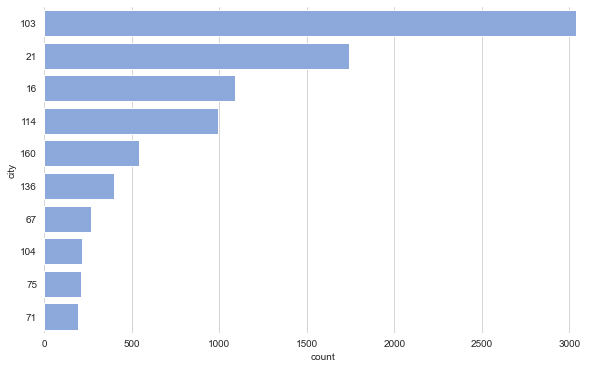

In [15]:
train['freq_candidate'] = train.groupby(['city'])['city'].transform('count')

counts_freq_candidate = train['city'].value_counts()
display(counts_freq_candidate.head(10))


plt.figure(figsize=(10, 6))
ax=sns.set_style("whitegrid")
ax=sns.countplot(y='city', data=train, color='#80A4E8', order = train['city'].value_counts().iloc[:10].index)
sns.despine(left=True, bottom=True)


In [16]:
train['city_count'] = train[train['target']>0].groupby(['city'])['city'].transform('count')
train['freq_target'] = train.groupby(['city'])['city_count'].transform('max')


counts_freq_target = train.groupby(['city','freq_target']).agg({'city': 'count'}).sort_values('freq_target', ascending = False)
display(counts_freq_target.head(10))




,,city
city,freq_target,
21,1022.0,1739
103,298.0,3035
11,85.0,150
114,85.0,991
16,80.0,1088
160,39.0,542
74,35.0,64
67,26.0,267
136,25.0,399


In [17]:
train['best_conversion_rate'] = (train['freq_target']/train['freq_candidate']).round(2)
best_conversion_city = train.groupby(['city','best_conversion_rate']).agg({'city': 'count'}).sort_values('best_conversion_rate', ascending = False)

display(best_conversion_city.head(25))


,,city
city,best_conversion_rate,
171,1.00,1
155,0.75,12
42,0.71,7
48,0.67,3
78,0.64,11
21,0.59,1739
145,0.58,24
11,0.57,150
101,0.55,42


In [18]:
train['top_city'] = train['city']
train['top_city'] = 'not top city'

top_city_candidate_number = 10
gold_city_candidate_number = 50
minimum_conversion_rate = 0.5

train.loc[(train['freq_candidate'] > top_city_candidate_number) & (train['best_conversion_rate'] > minimum_conversion_rate), 'top_city'] = 'top city'
train.loc[(train['freq_candidate'] > gold_city_candidate_number) & (train['best_conversion_rate'] > minimum_conversion_rate), 'top_city'] = 'gold city'


top_cities = train[train['top_city'] == 'top city'].groupby(['city','best_conversion_rate']).agg({'city': 'count'}).sort_values('best_conversion_rate', ascending = False)
gold_cities = train[train['top_city'] == 'gold city'].groupby(['city','best_conversion_rate']).agg({'city': 'count'}).sort_values('best_conversion_rate', ascending = False)

# Change order of values for 'top_city' for displaying purpose
train['top_city'] = pd.Categorical(train['top_city'], ["gold city", "top city","not top city"])

print("The cities with a minimum candidate conversion rate of", minimum_conversion_rate, "and at least",top_city_candidate_number, "candidates are:")
display(top_cities)

print("\nThe cities with a minimum candidate conversion rate of", minimum_conversion_rate, "and at least",gold_city_candidate_number, "candidates are:")
display(gold_cities)


The cities with a minimum candidate conversion rate of 0.5 and at least 10 candidates are:


,,city
city,best_conversion_rate,
155,0.75,12
78,0.64,11
145,0.58,24
101,0.55,42
128,0.55,44



The cities with a minimum candidate conversion rate of 0.5 and at least 50 candidates are:


,,city
city,best_conversion_rate,
21,0.59,1739
11,0.57,150
74,0.55,64


<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

In [19]:
new_variable_name = 0

def newVariableBasedOnExistingWithHueVariable(existing_variable,new_variable_name,hue_variable):
    # group by gender and target and aggregate by counting the items in each of this categories
    new_variable_name = train.groupby([existing_variable,hue_variable,'target']).agg({'target': 'count'})
    new_variable_name['%'] = new_variable_name.groupby(level=[0,1]).apply(lambda x: x / x.sum()*100).round(2)
    display(new_variable_name)


In [20]:
new_variable_name = 0

def plotVariableVsTarget(existing_variable, max_y, hue_variable,rotation_factor,ci_value):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    #plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

    #sns.set_style("ticks")
    #sns.set_style("whitegrid") 
    
    lp=sns.barplot(x=existing_variable, y='target', data=train, ax=ax[0], color='#006b94', ci=ci_value)
    lp.axes.set_ylim(0,max_y)
    lp.axes.set(xlabel =existing_variable, ylabel = 'proportion of target candiates', title ='Total data set')
    lp.set_xticklabels(lp.get_xticklabels(), rotation=rotation_factor);
    sns.despine()
    
    lp=sns.barplot(x=existing_variable, y='target', hue=hue_variable, data=train, ax=ax[1], palette=['#ffdd00', '#94c11c','#e3000f','#f39100'], ci=ci_value)
    lp.axes.set_ylim(0,max_y)
    lp.axes.set(xlabel =existing_variable, ylabel = '', title ='Data set cosidering city type')
    lp.set_xticklabels(lp.get_xticklabels(), rotation=rotation_factor);
    sns.despine(left=True)
   

## City: statistics, data visualizations (II) and measures of correlation

target      %
top_city     target               
gold city    0.0        811  41.53
             1.0       1142  58.47
top city     0.0         56  42.11
             1.0         77  57.89
not top city 0.0       9622  90.62
             1.0        996   9.38

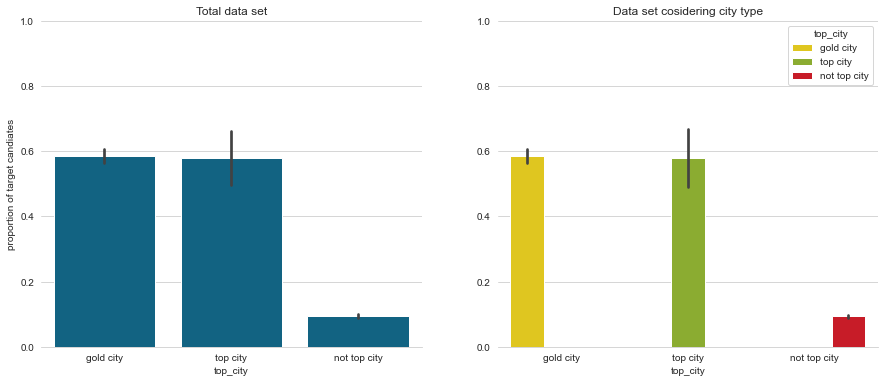

In [21]:
top_city_counts=0
newVariableBasedOnExisting('top_city',top_city_counts)

plotVariableVsTarget('top_city',1,'top_city',0,95)

## Gender: statistics, data visualizations and measures of correlation

target      %
gender  target               
Female  0.0        750  84.27
        1.0        140  15.73
Male    0.0       7658  83.86
        1.0       1474  16.14
Other   0.0         93  86.92
        1.0         14  13.08
no info 0.0       1988  77.20
        1.0        587  22.80

target       %
gender  top_city     target                
Female  gold city    0.0         54   47.79
                     1.0         59   52.21
        top city     0.0          1   16.67
                     1.0          5   83.33
        not top city 0.0        695   90.14
                     1.0         76    9.86
Male    gold city    0.0        488   40.43
                     1.0        719   59.57
        top city     0.0         39   43.33
                     1.0         51   56.67
        not top city 0.0       7131   91.01
                     1.0        704    8.99
Other   gold city    0.0          1  100.00
                     1.0          0    0.00
        top city     0.0          0    0.00
                     1.0          1  100.00
        not top city 0.0         92   87.62
                     1.0         13   12.38
no info gold city    0.0        268   42.41
                     1.0        364   57.59
        top city     0.0         16   44.44
                     1.0         20   55.56
        not top city 0.0       1704   89.36
                     1.0        203   10.64

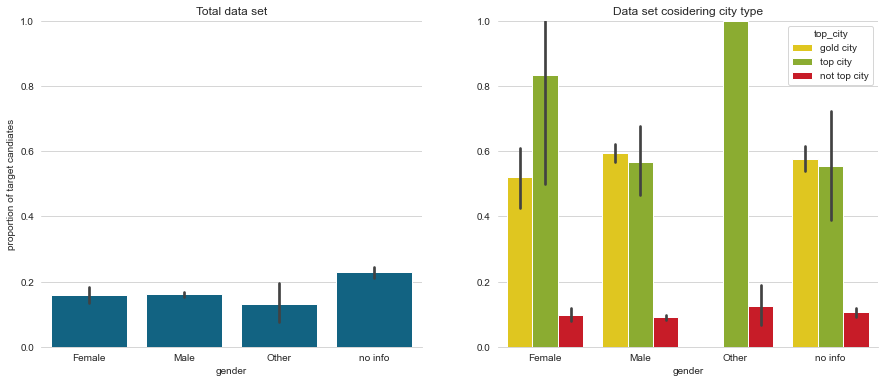

In [22]:
gender_counts=0
newVariableBasedOnExisting('gender',gender_counts)

newVariableBasedOnExistingWithHueVariable('gender',gender_counts,'top_city')

plotVariableVsTarget('gender',1, 'top_city',0,95)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Relevant experience: statistics, data visualizations and measures of correlation

target      %
relevent_experience     target               
No relevent experience  0.0       1510  79.18
                        1.0        397  20.82
Has relevent experience 0.0       8979  83.16
                        1.0       1818  16.84

target      %
relevent_experience     top_city     target               
No relevent experience  gold city    0.0        114  42.38
                                     1.0        155  57.62
                        top city     0.0         12  42.86
                                     1.0         16  57.14
                        not top city 0.0       1384  85.96
                                     1.0        226  14.04
Has relevent experience gold city    0.0        697  41.39
                                     1.0        987  58.61
                        top city     0.0         44  41.90
                                     1.0         61  58.10
                        not top city 0.0       8238  91.45
                                     1.0        770   8.55

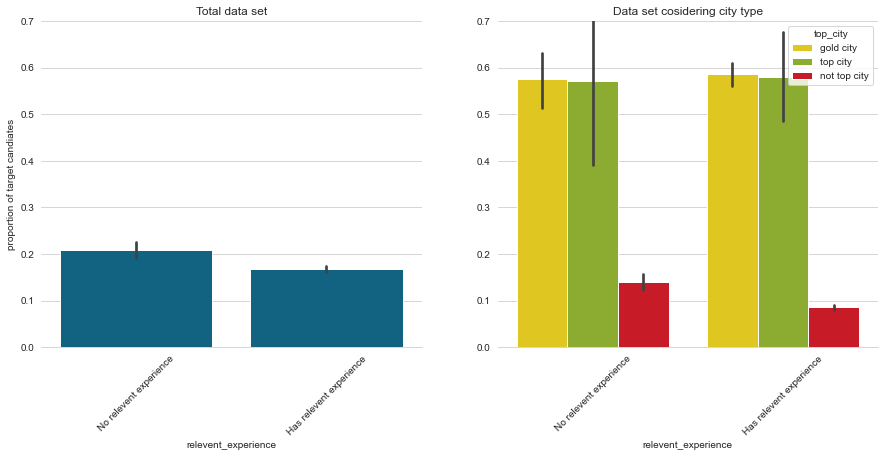

In [23]:
relevent_experience_counts=0
newVariableBasedOnExisting('relevent_experience',relevent_experience_counts)

newVariableBasedOnExistingWithHueVariable('relevent_experience',relevent_experience_counts,'top_city')

plotVariableVsTarget('relevent_experience',0.7, 'top_city',45,95)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Enrolled university: statistics, data visualizations and measures of correlation

target      %
enrolled_university target               
no_enrollment       0.0       8620  83.84
                    1.0       1662  16.16
Part time course    0.0        717  84.06
                    1.0        136  15.94
Full time course    0.0       1152  73.42
                    1.0        417  26.58

target      %
enrolled_university top_city     target               
no_enrollment       gold city    0.0        598  41.27
                                 1.0        851  58.73
                    top city     0.0         41  40.59
                                 1.0         60  59.41
                    not top city 0.0       7981  91.40
                                 1.0        751   8.60
Part time course    gold city    0.0         38  45.24
                                 1.0         46  54.76
                    top city     0.0          6  46.15
                                 1.0          7  53.85
                    not top city 0.0        673  89.02
                                 1.0         83  10.98
Full time course    gold city    0.0        175  41.67
                                 1.0        245  58.33
                    top city     0.0          9  47.37
                                 1.0         10  52.63
                    not top city 0.0        968  85.66
                                 1.0        162  14.34

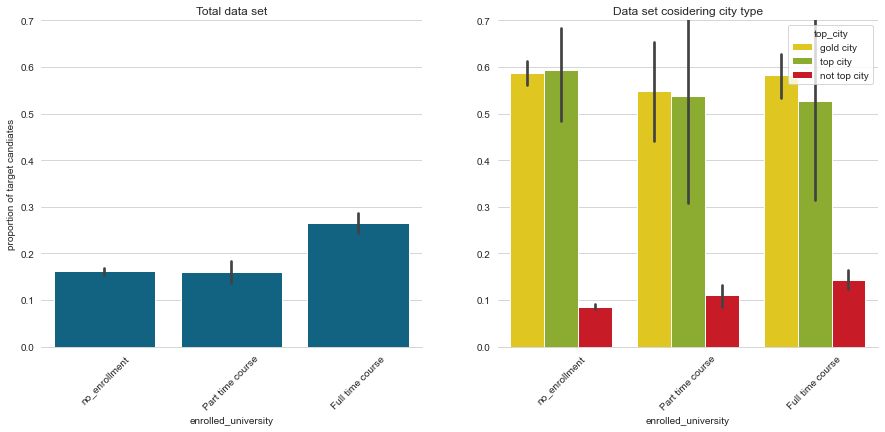

In [24]:
enrolled_university_counts=0
newVariableBasedOnExisting('enrolled_university',enrolled_university_counts)

newVariableBasedOnExistingWithHueVariable('enrolled_university',enrolled_university_counts,'top_city')

plotVariableVsTarget('enrolled_university',0.7, 'top_city',45,95)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Education level: statistics, data visualizations and measures of correlation

target      %
education_level target               
Primary School  0.0         52  83.87
                1.0         10  16.13
High School     0.0        745  89.98
                1.0         83  10.02
Masters         0.0       2776  83.94
                1.0        531  16.06
Graduate        0.0       6641  81.09
                1.0       1549  18.91
Phd             0.0        275  86.75
                1.0         42  13.25

target      %
education_level top_city     target               
Primary School  gold city    0.0          1  20.00
                             1.0          4  80.00
                top city     0.0          0    NaN
                             1.0          0    NaN
                not top city 0.0         51  89.47
                             1.0          6  10.53
High School     gold city    0.0          7  53.85
                             1.0          6  46.15
                top city     0.0          5  62.50
                             1.0          3  37.50
                not top city 0.0        733  90.83
                             1.0         74   9.17
Masters         gold city    0.0        214  42.71
                             1.0        287  57.29
                top city     0.0          5  35.71
                             1.0          9  64.29
                not top city 0.0       2557  91.58
                             1.0        235   8.42
Graduate        gold city    0.0        587  41.02
                             1.0        844  58.98
                top city     0.0         46  41.44
                             1.0         65  58.56
                not top city 0.0       6008  90.37
                             1.0        640   9.63
Phd             gold city    0.0          2  66.67
                             1.0          1  33.33
                top city     0.0          0    NaN
                             1.0          0    NaN
                not top city 0.0        273  86.94
                             1.0         41  13.06

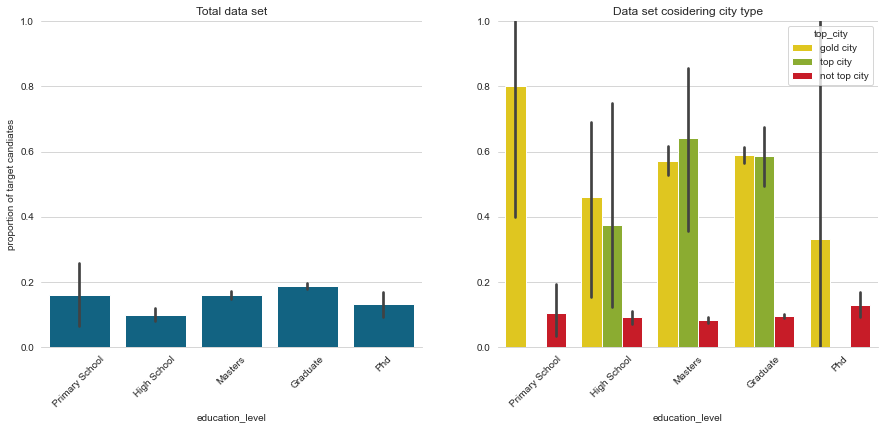

In [25]:
education_level_counts=0
newVariableBasedOnExisting('education_level',education_level_counts)

newVariableBasedOnExistingWithHueVariable('education_level',education_level_counts,'top_city')

plotVariableVsTarget('education_level',1, 'top_city',45,95)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Major discipline: statistics, data visualizations and measures of correlation

target      %
major_discipline target               
Arts             0.0        162  90.50
                 1.0         17   9.50
Business Degree  0.0        188  87.44
                 1.0         27  12.56
Humanities       0.0        412  88.41
                 1.0         54  11.59
STEM             0.0       8583  81.32
                 1.0       1971  18.68
Other            0.0        210  87.50
                 1.0         30  12.50
No Major         0.0        126  86.90
                 1.0         19  13.10
no info          0.0        808  89.28
                 1.0         97  10.72

target       %
major_discipline top_city     target                
Arts             gold city    0.0          1   50.00
                              1.0          1   50.00
                 top city     0.0          1  100.00
                              1.0          0    0.00
                 not top city 0.0        160   90.91
                              1.0         16    9.09
Business Degree  gold city    0.0          4   28.57
                              1.0         10   71.43
                 top city     0.0          0    0.00
                              1.0          1  100.00
                 not top city 0.0        184   92.00
                              1.0         16    8.00
Humanities       gold city    0.0          2   50.00
                              1.0          2   50.00
                 top city     0.0          0    0.00
                              1.0          2  100.00
                 not top city 0.0        410   89.13
                              1.0         50   10.87
STEM             gold city    0.0        776   41.59
                              1.0       1090   58.41
                 top city     0.0         49   42.24
                              1.0         67   57.76
                 not top city 0.0       7758   90.50
                              1.0        814    9.50
Other            gold city    0.0         16   48.48
                              1.0         17   51.52
                 top city     0.0          1   33.33
                              1.0          2   66.67
                 not top city 0.0        193   94.61
                              1.0         11    5.39
No Major         gold city    0.0          3   21.43
                              1.0         11   78.57
                 top city     0.0          0    0.00
                              1.0          2  100.00
                 not top city 0.0        123   95.35
                              1.0          6    4.65
no info          gold city    0.0          9   45.00
                              1.0         11   55.00
                 top city     0.0          5   62.50
                              1.0          3   37.50
                 not top city 0.0        794   90.54
                              1.0         83    9.46

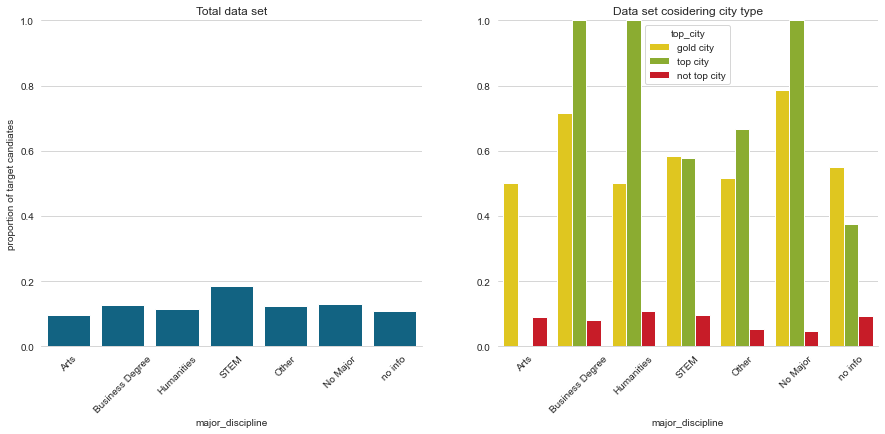

In [26]:
major_discipline_counts=0
newVariableBasedOnExisting('major_discipline',major_discipline_counts)

newVariableBasedOnExistingWithHueVariable('major_discipline',major_discipline_counts,'top_city')

plotVariableVsTarget('major_discipline',1, 'top_city',45, None)


<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Experience: statistics, data visualizations and measures of correlation

target      %
experience target               
<1         0.0        122  58.37
           1.0         87  41.63
1          0.0        150  61.48
           1.0         94  38.52
2          0.0        417  76.94
           1.0        125  23.06
3          0.0        505  70.83
           1.0        208  29.17
4          0.0        614  76.85
           1.0        185  23.15
5          0.0        693  76.57
           1.0        212  23.43
6          0.0        640  77.20
           1.0        189  22.80
7          0.0        544  78.16
           1.0        152  21.84
8          0.0        478  82.27
           1.0        103  17.73
9          0.0        595  83.10
           1.0        121  16.90
10         0.0        628  83.62
           1.0        123  16.38
11         0.0        423  84.26
           1.0         79  15.74
12         0.0        331  85.53
           1.0         56  14.47
13         0.0        266  84.98
           1.0         47  15.02
14         0.0        398  86.33
           1.0         63  13.67
15         0.0        477  87.68
           1.0         67  12.32
16         0.0        353  89.59
           1.0         41  10.41
17         0.0        224  86.82
           1.0         34  13.18
18         0.0        194  91.08
           1.0         19   8.92
19         0.0        203  88.65
           1.0         26  11.35
20         0.0         92  89.32
           1.0         11  10.68
>20        0.0       2142  92.53
           1.0        173   7.47

target       %
experience top_city     target                
<1         gold city    0.0         40   38.46
                        1.0         64   61.54
           top city     0.0          1   16.67
                        1.0          5   83.33
           not top city 0.0         81   81.82
...                                ...     ...
>20        gold city    1.0         10   41.67
           top city     0.0          0    0.00
                        1.0          1  100.00
           not top city 0.0       2128   92.93
                        1.0        162    7.07

[132 rows x 2 columns]

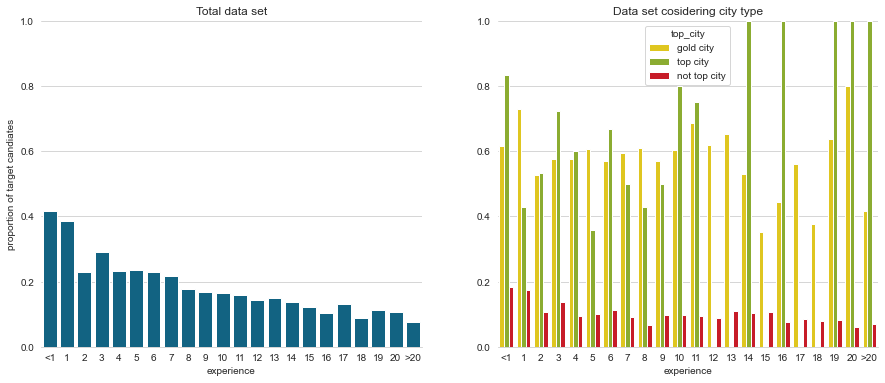

In [27]:
experience_counts=0

newVariableBasedOnExisting('experience',experience_counts)

newVariableBasedOnExistingWithHueVariable('experience',experience_counts,'top_city')

plotVariableVsTarget('experience',1, 'top_city',0,None)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Company size: statistics, data visualizations and measures of correlation

target      %
company_size target               
<10          0.0       1038  83.57
             1.0        204  16.43
10/49        0.0       1084  77.76
             1.0        310  22.24
50-99        0.0       2433  82.47
             1.0        517  17.53
100-500      0.0       2095  84.37
             1.0        388  15.63
500-999      0.0        703  83.00
             1.0        144  17.00
1000-49996   0.0          0    NaN
             1.0          0    NaN
5000-9999    0.0        445  82.10
             1.0         97  17.90
10000+       0.0       1596  81.26
             1.0        368  18.74

target       %
company_size top_city     target                
<10          gold city    0.0         65   37.36
                          1.0        109   62.64
             top city     0.0         12   52.17
                          1.0         11   47.83
             not top city 0.0        961   91.96
                          1.0         84    8.04
10/49        gold city    0.0         91   34.73
                          1.0        171   65.27
             top city     0.0         10   34.48
                          1.0         19   65.52
             not top city 0.0        983   89.12
                          1.0        120   10.88
50-99        gold city    0.0        206   42.47
                          1.0        279   57.53
             top city     0.0         17   43.59
                          1.0         22   56.41
             not top city 0.0       2210   91.10
                          1.0        216    8.90
100-500      gold city    0.0        160   44.94
                          1.0        196   55.06
             top city     0.0         11   42.31
                          1.0         15   57.69
             not top city 0.0       1924   91.58
                          1.0        177    8.42
500-999      gold city    0.0         57   43.18
                          1.0         75   56.82
             top city     0.0          3   50.00
                          1.0          3   50.00
             not top city 0.0        643   90.69
                          1.0         66    9.31
1000-49996   gold city    0.0          0     NaN
                          1.0          0     NaN
             top city     0.0          0     NaN
                          1.0          0     NaN
             not top city 0.0          0     NaN
                          1.0          0     NaN
5000-9999    gold city    0.0         28   39.44
                          1.0         43   60.56
             top city     0.0          1  100.00
                          1.0          0    0.00
             not top city 0.0        416   88.51
                          1.0         54   11.49
10000+       gold city    0.0        138   40.71
                          1.0        201   59.29
             top city     0.0          0    0.00
                          1.0          5  100.00
             not top city 0.0       1458   90.00
                          1.0        162   10.00

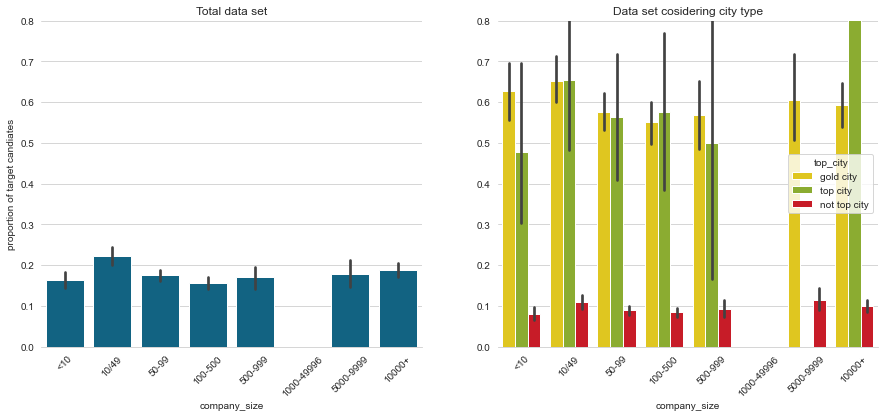

In [28]:
company_size_counts=0

newVariableBasedOnExisting('company_size',company_size_counts)

newVariableBasedOnExistingWithHueVariable('company_size',company_size_counts,'top_city')

plotVariableVsTarget('company_size',0.8, 'top_city',45,95)


<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Company type: statistics, data visualizations and measures of correlation

target      %
company_type        target               
Early Stage Startup 0.0        437  78.04
                    1.0        123  21.96
Funded Startup      0.0        834  85.89
                    1.0        137  14.11
Public Sector       0.0        648  81.61
                    1.0        146  18.39
Pvt Ltd             0.0       7519  82.55
                    1.0       1589  17.45
NGO                 0.0        396  83.19
                    1.0         80  16.81
Other               0.0         82  76.64
                    1.0         25  23.36
no info             0.0        573  83.28
                    1.0        115  16.72

target      %
company_type        top_city     target               
Early Stage Startup gold city    0.0         58  41.43
                                 1.0         82  58.57
                    top city     0.0          7  46.67
                                 1.0          8  53.33
                    not top city 0.0        372  91.85
                                 1.0         33   8.15
Funded Startup      gold city    0.0         52  41.94
                                 1.0         72  58.06
                    top city     0.0          4  50.00
                                 1.0          4  50.00
                    not top city 0.0        778  92.73
                                 1.0         61   7.27
Public Sector       gold city    0.0         19  43.18
                                 1.0         25  56.82
                    top city     0.0          1  16.67
                                 1.0          5  83.33
                    not top city 0.0        628  84.41
                                 1.0        116  15.59
Pvt Ltd             gold city    0.0        618  41.84
                                 1.0        859  58.16
                    top city     0.0         39  41.94
                                 1.0         54  58.06
                    not top city 0.0       6862  91.03
                                 1.0        676   8.97
NGO                 gold city    0.0         18  36.00
                                 1.0         32  64.00
                    top city     0.0          2  33.33
                                 1.0          4  66.67
                    not top city 0.0        376  89.52
                                 1.0         44  10.48
Other               gold city    0.0          3  23.08
                                 1.0         10  76.92
                    top city     0.0          0    NaN
                                 1.0          0    NaN
                    not top city 0.0         79  84.04
                                 1.0         15  15.96
no info             gold city    0.0         43  40.95
                                 1.0         62  59.05
                    top city     0.0          3  60.00
                                 1.0          2  40.00
                    not top city 0.0        527  91.18
                                 1.0         51   8.82

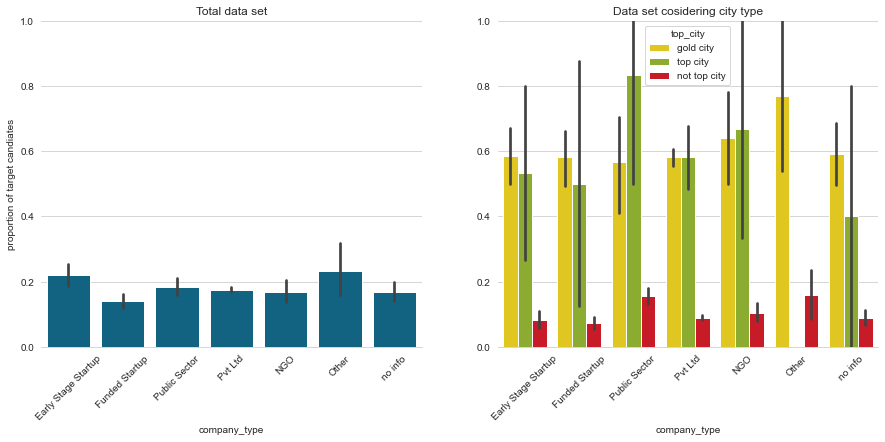

In [29]:
company_type_counts=0

newVariableBasedOnExisting('company_type',company_type_counts)

newVariableBasedOnExistingWithHueVariable('company_type',company_type_counts,'top_city')

plotVariableVsTarget('company_type',1, 'top_city',45,95)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Last new job: statistics, data visualizations and measures of correlation

target      %
last_new_job target               
never        0.0        491  76.48
             1.0        151  23.52
1            0.0       4645  81.18
             1.0       1077  18.82
2            0.0       1816  81.76
             1.0        405  18.24
3            0.0        667  82.86
             1.0        138  17.14
4            0.0        671  82.74
             1.0        140  17.26
>4           0.0       2199  87.85
             1.0        304  12.15

target       %
last_new_job top_city     target                
never        gold city    0.0         75   42.61
                          1.0        101   57.39
             top city     0.0          7   53.85
                          1.0          6   46.15
             not top city 0.0        409   90.29
                          1.0         44    9.71
1            gold city    0.0        417   39.90
                          1.0        628   60.10
             top city     0.0         36   43.90
                          1.0         46   56.10
             not top city 0.0       4192   91.23
                          1.0        403    8.77
2            gold city    0.0        148   42.05
                          1.0        204   57.95
             top city     0.0          9   34.62
                          1.0         17   65.38
             not top city 0.0       1659   90.02
                          1.0        184    9.98
3            gold city    0.0         52   46.02
                          1.0         61   53.98
             top city     0.0          0    0.00
                          1.0          2  100.00
             not top city 0.0        615   89.13
                          1.0         75   10.87
4            gold city    0.0         34   38.64
                          1.0         54   61.36
             top city     0.0          1   33.33
                          1.0          2   66.67
             not top city 0.0        636   88.33
                          1.0         84   11.67
>4           gold city    0.0         85   47.49
                          1.0         94   52.51
             top city     0.0          3   42.86
                          1.0          4   57.14
             not top city 0.0       2111   91.11
                          1.0        206    8.89

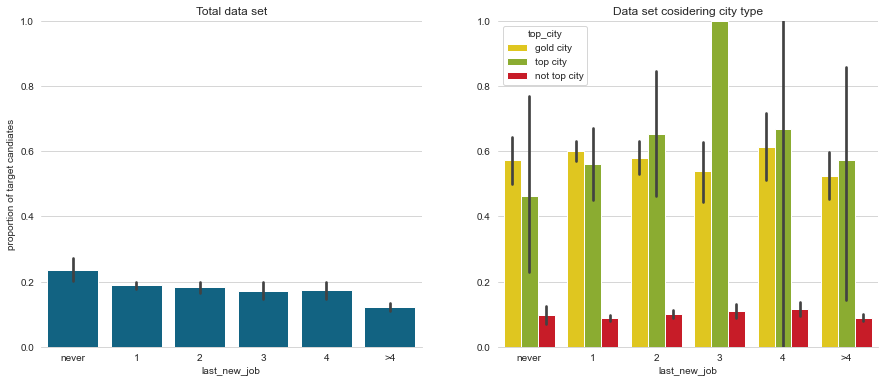

In [30]:
last_new_job_counts=0

newVariableBasedOnExisting('last_new_job',last_new_job_counts)

newVariableBasedOnExistingWithHueVariable('last_new_job',last_new_job_counts,'top_city')

plotVariableVsTarget('last_new_job',1, 'top_city',0,95)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## Training hours: statistics, data visualizations and measures of correlation

In [31]:
#training_hours_counts = 0
#newVariableBasedOnExisting('training_hours',training_hours_counts)

#train['training_ten_hours'] = (np.floor(train['training_hours']/10)*10).astype(int)

#sns.set_style("white")    
#plt.figure(figsize=(8, 6))
#ax=sns.lineplot(x='training_ten_hours', y='target', hue='top_city',data=train, palette=['#ffdd00', '#94c11c','#e3000f'], ci=None)
#ax.yaxis.set_major_formatter(PercentFormatter(1.0))
#ax.set(xlabel='total training hours', ylabel='proportion of target candiates',title ='Total trainings hours considering city types')

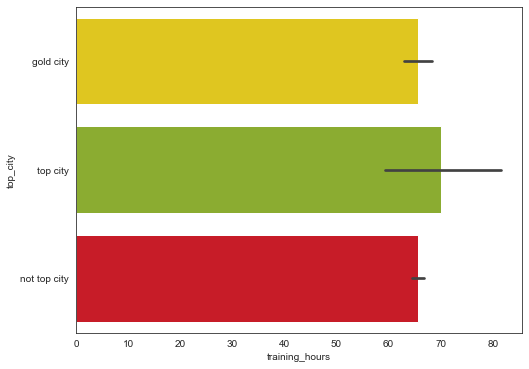

<Figure size 576x432 with 0 Axes>

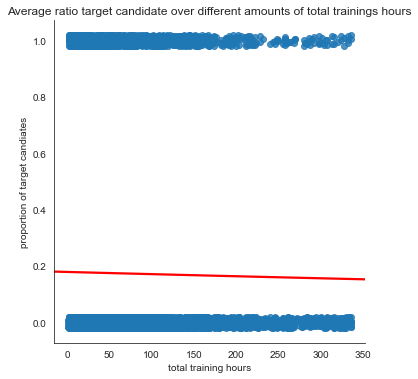

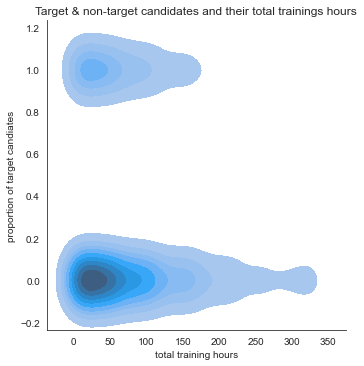

In [32]:
# Setting the plotting theme
sns.set_style("white")  
# Setting the size of all plots.
plt.figure(figsize=(8,6))
# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter

# Plotting city_development_index 
lp=sns.barplot(x='training_hours', y='top_city', orient='h', data=train, palette=['#ffdd00', '#94c11c','#e3000f','#f39100'])

plt.figure(figsize=(8, 6))
ax=sns.lmplot(x='training_hours', y='target', data=train, ci=None,y_jitter=.02, logistic=True, truncate=False, line_kws={'color' : 'red'})
ax.set(xlabel='total training hours', ylabel='proportion of target candiates',title ='Average ratio target candidate over different amounts of total trainings hours')
ax=sns.displot(x='training_hours', y='target', data=train, kind='kde', fill=True)
ax.set(xlabel='total training hours', ylabel='proportion of target candiates',title ='Target & non-target candidates and their total trainings hours')

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

## City development index: statistics, data visualizations and measures of correlation

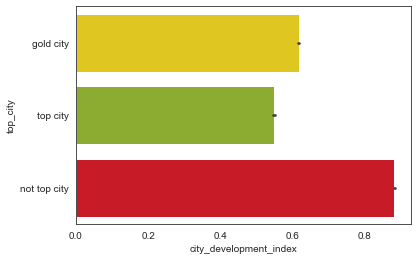

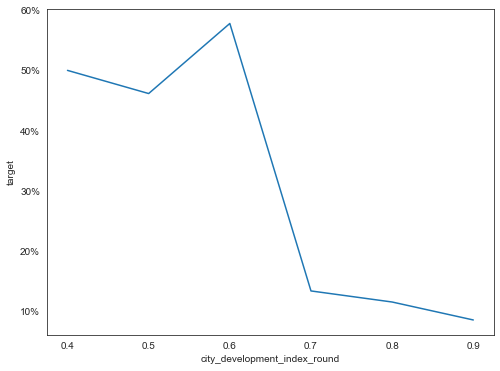

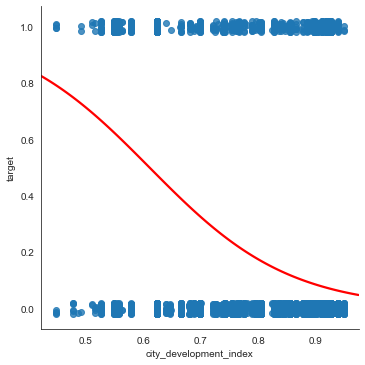

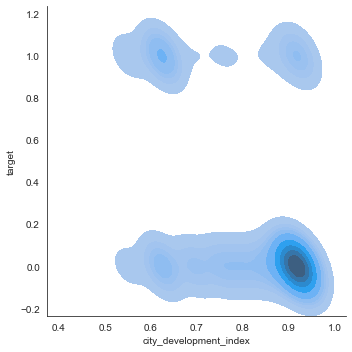

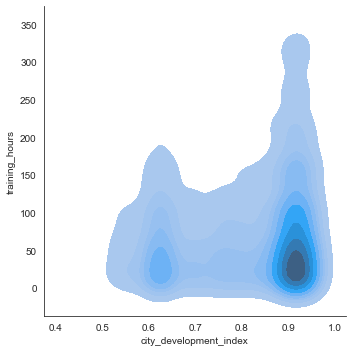

In [33]:
from matplotlib.ticker import PercentFormatter
train['city_development_index_round'] = train['city_development_index'].round(1)

ax=sns.barplot(x='city_development_index', y='top_city', orient='h', data=train, palette=['#ffdd00', '#94c11c','#e3000f','#f39100'])


# Setting the size of all plots.
sns.set_style("white")
plt.figure(figsize=(8, 6))


# Plotting city_development_index
ax = sns.lineplot(x='city_development_index_round',
                  y='target', data=train, ci=None)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax = sns.lmplot(x='city_development_index', y='target', data=train, ci=None,
                y_jitter=.02, logistic=True, truncate=False, line_kws={'color': 'red'})
ax = sns.displot(x='city_development_index', y='target',
                 data=train, kind='kde', fill=True)


    
ax=sns.displot(x='city_development_index', y='training_hours', data=train ,kind='kde', fill= True)

<div class="alert alert-block alert-info">
    
>### Interpretation of individual result
What does the result mean?
Does it answer your question?
Is it robust?

</div>

In [35]:
# open taskt
# 1. chi2 test
# 2. logistic regression
# 3. catplot (below)

sns.catplot(data=train, kind="swarm", x="enrolled_university", y="last_new_job", hue="gender")

/*Nominal scale

city
gender
major_discipline
company_type
target
Ordinal scale

enrolled_university
relevent_experience
education_level
experience
company_size
last_new_job
Cardinal scale

training_hours
city_development_index*/

SyntaxError: invalid syntax (<ipython-input-35-2652c5efe482>, line 15)

<div style="background-color: #f39100; color: #006b94">

from module description / to check progress against:

# Results


Report your results using figures, tables and statistics. All figures and tables should be accompanied with captions and be referenced in the text. Use them as evidence of the message you want to communicate. No interpretation of the results occurs here. That is saved for the Discussion section.

### Tips for writing the results section

From [1]

- **Summarise** what the raw data shows
- Point out simple **relationships**
- Describe **trends**
- Cite **figures and tables**
- Break into **subsections**, with **headings** (if needed)
- Complement the information that is already in the figure
- **Give precise values** that are **not available in the figures**
- **Highlight** only the most important numbers
- Don't forgot to talk about the **negative results**
- **Verb tense**
    - past for completed actions; We found that… Women were more likely to… Men smoked more cigarettes than… The average reaction time was…
    - Present to assertions that continue to be true, such as what the tables show, what you believe, and what the data suggest; Figure 1 shows… The findings confirm… The data suggests… We believe that this shows…
- Use the **active voice**
    
</div>